!['image'](https://www.researchgate.net/profile/Walayat-Hussain/publication/349860057/figure/fig1/AS:998592189825025@1615094339246/Machine-learning-algorithms-classification.ppm)

### 일반화(Generalization)

    : 일반적으로 훈련데이터와 테스트 데이터로 구분
    
    -> 훈련세트에 대헤 정확히 예측하도록 모델을 구축해도 테스트 세트에 대해 
    
       정확히 예측하도록 일반화 하기 어려움

### 과대적합(overfitting)
    : 너무 복잡한 모델을 만들어 훈련세트에 너무 가깝게 맞춰져 새로운 데이터에 일반화 불가
    
### 과소적합(underfitting)
    : 너무 간단한 모델을 만들어 데이터의 다양성을 잡아내지 못하는 경우

!['image'](https://velog.velcdn.com/images%2Frapsby%2Fpost%2F97d121fb-3489-412f-bf04-a3ec1a79678f%2Fimage.png)

## 지도학습 알고리즘

### 데이터 셋 준비하기
    - forge 데이터 셋 : 인위적으로 만든 이진 분류 데이터 셋

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [6]:
X , y = mglearn.datasets.make_forge()

X.shape (26, 2)


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


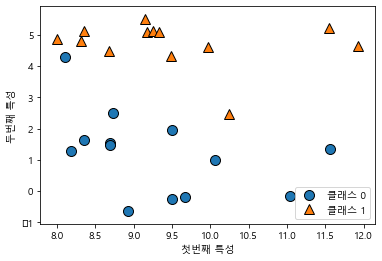

In [7]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(['클래스 0','클래스 1'],loc=4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape', X.shape)
plt.show()

#### 위스콘신 유방암 데이터 셋

- 각 종양은 양성(benign)과 악성(malignant)으로 레이블 되어있으며 종양이 악성인지 예측

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
print('유방암 데이터의 형태 :', cancer.data.shape)

유방암 데이터의 형태 : (569, 30)


#### np.bincount( ): 0과 1로 구성된 데이터 개수를 각각 세어주는 함수

In [11]:
import numpy as np
print('클래스 별 샘플 개수 \n',
     {n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스 별 샘플 개수 
 {'malignant': 212, 'benign': 357}


In [12]:
print('특성 이름: \n', cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
cancer_data = cancer.data
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df['label']=cancer.target
cancer_df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


#### 회귀분석용 보스턴 주택가격 데이터셋

In [14]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.datasets import load_boston
boston = load_boston()

X ,y = mglearn.datasets.load_extended_boston()
print('X.shape:',X.shape)

X.shape: (506, 104)


In [15]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['label']=boston.target
boston_df.tail(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


# 1. 분류 모델

## K 최근접 이웃  분류 (K-Nearest Neighbors Classification)
    
    - 가장 가까운 최근접 이웃의 평균을 예측값으로 취함
    - 데이터 포인트 주변에 가장 가까이 존재하는 k개의 데이터와 비교함

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


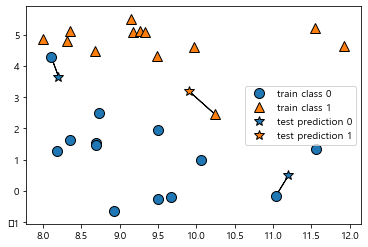

In [16]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [17]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

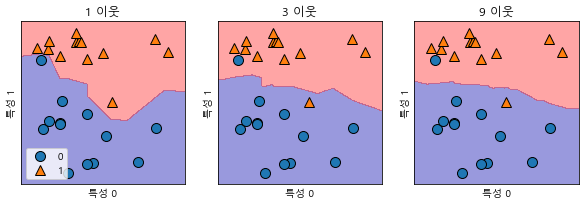

In [20]:
#subplot 1줄에 3개짜리 생성
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

#이웃의 갯수에 따른 최근접 이웃 모델의 경계
#1개/3개/9개의 이웃일 때의 경계를 표시
for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit메소드는 self 오브젝트를 리턴
    #객체 생성과 fit 메소드를 한 줄에 쓸 수 있음
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) #epsilon
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show()

## 유방암 데이터세트 성능 평가

### 모델의 복잡도와 일반화 사이의 관계

- 이웃의 수가 적으면 모델은 복잡해지고 훈련 정확도는 큼(과대적합)
- 이웃의 수가 커지면 모델은 단순해 지고 훈련 정확도는 줄어듦(과소적합)
- 반대로 테스트 정확도는 높아지지만 이웃의 수가 클 때는 모델이 단순해 지므로 정확도가 감소

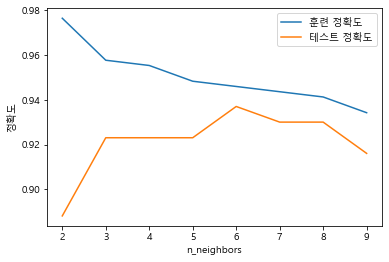

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = np.arange(2, 10)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() 

### K-Neighbors Regression(K-최근접 이웃회귀)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


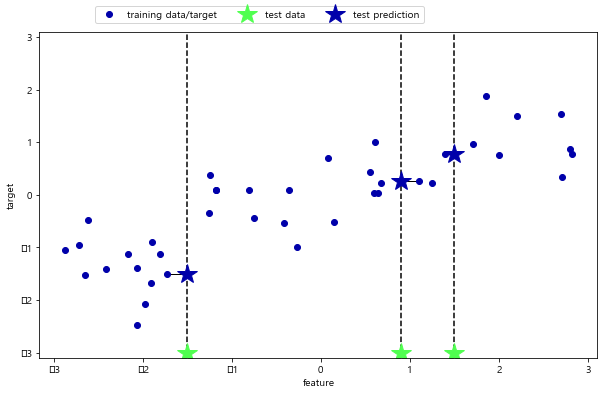

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
reg.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [24]:
print('테스트 세트 예측\n', reg.predict(X_test))

테스트 세트 예측
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


## KNeighborsRegression 분석

#### Wave 데이터 세트 성능 평가 결과
    
        - 이웃을 적게 사용하면 매우 불안정한 예측
        - 이웃을 많이 사용하면 테스트 데이터에는 잘 안맞지만 안정된 예측

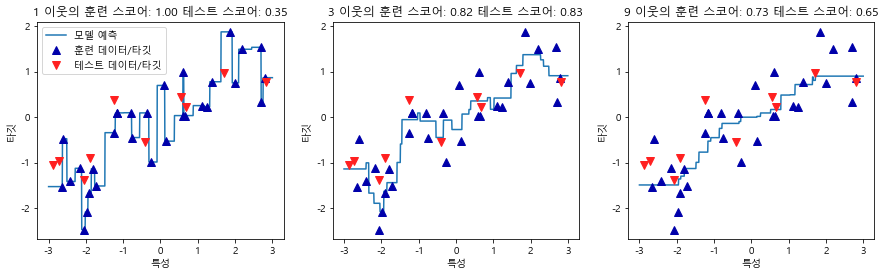

In [25]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()

# 2. 선형 모델(linear Model)

### 회귀 선형 모델

w[0]: 0.393906  b: -0.031804


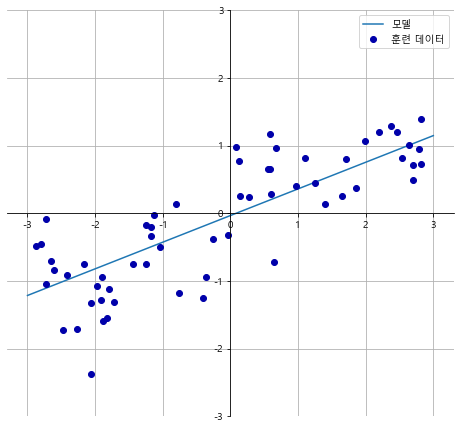

In [26]:
mglearn.plots.plot_linear_regression_wave()

## 최소적합법

In [27]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [28]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [29]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 릿지 회귀 - L2 규제

!['image'](https://blog.kakaocdn.net/dn/phZk0/btq3DwvcSNQ/zyrunIPkBktf0S3i0kQ0fK/img.png)

* LinearRegression에 비해 훈련 세트에서는 점수가 낮지만 테스트 세트에 대한 점수는 더 높다
* 선형 회귀는 이 데이터 셋에서 과대적합되지만 Ridge는 덜 자유로운 모델이기에 과대 적합이 적어진다.
* 모델의 복잡도가 낮아지면 훈련 세트에서의 성능은 나빠지지만 더 일반화된 모델이 된다.
* 우리가 관심있는 것은 훈련세트가 아닌 테스트 세트이므로 Ridge 모델을 선택해야 한다
* Ridge는 모델을 단순하게 해 주고 훈련세트에 대한 성능 사이를 절충할 수 있는 방법을 제공

##### alpha 값에 따른 규제 

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


In [32]:
#alpha 매개변수로 훈련 세트의 성능 대비 모델을 얼마나 단순화 할지 지정
#alpha 값을 높이면 계수를 0에 더 가깝게 만들어 훈련세트의 성능은 나빠지지만 일반화가 쉬움
#Train data score와 test data score 값 차이가 적을수록 일반화

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [33]:
#반대로 alpha 값을 줄이면 계수에 대한 제약이 그만큼 풀리면서 
#LinearRegression을 만든 모델과 거의 같아짐
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


####  alpha 값에 따른 coef 속성의 변화 확인하기
* alpha값에 다른 coef속성의 변화를 그래프로 확인
* alpha 매개변수가 모델을 어떻게 변경시키는지 이해 가능
* alpha값이 높으면 제약이 많으므로 작은값일 때 보다 절대값의 크기가 작음(일반화가 쉬워짐)
* 규제는 머신러닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 방해하는 것

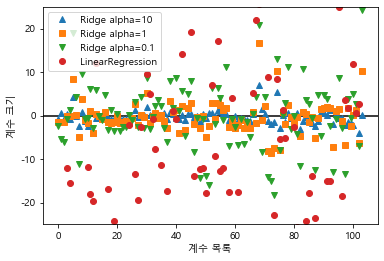

In [34]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show() 

##### 위 그림은 선형회귀/Ridge 회귀의 alpha값에 다른 그래프를 확인할 수 있음
##### alpha 값이 커질수록 0에 가까워 짐을 확인할 수 있음 -> score는 낮아지지만 일반화 되어짐

### 데이터 셋의 크기에 따른 모델의 성능 변화 확인하기
##### 학습 곡선 : 데이터셋의 샘플링에 따른 모델의 성능변화 그래프

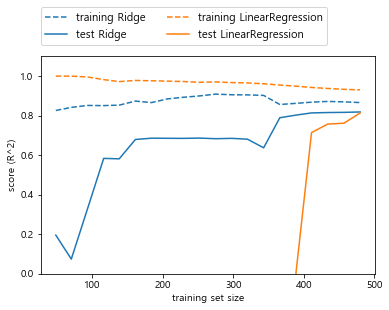

In [35]:
mglearn.plots.plot_ridge_n_samples()

##### 모든 데이터셋에 대해 릿지와 선형회귀 모두 훈련세트 점수가 테스트 세트 점수보다 높다.

* 릿지 회귀에는 규제가 적용되므로 릿지훈련데이터 점수가 전체적으로 선형회귀 훈련데이터 점수보다 낮음
* 그러나 테스트 데이터에서 릿지의 점수가 더 높고, 특별히 작은 데이터 셋에서는 더 그렇다.
* 두 모델의 성능은 데이터가 많아질수록 좋아지고 마지막에 선형 회귀가 리지 회귀가 따라잡음
* 데이터를 충분히 주면 규제항은 덜 중요해져서 리지 회귀와 선형회귀의 성능이 같아짐 

### 라소 - L1 규제

* 릿지 회귀에서와 같이 라소도 계수를 0에 가깝게 만들 수 있음
* L1규제를 하면 어떤 계수는 정말 0 이 되고, 모델에서 완전히 제외되는 특성이 생김

!['image'](https://blog.kakaocdn.net/dn/bKAfrE/btqufceqZ3r/r8lm3SzgZYeQnTYK1K9cM1/img.png)

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수 : {:.2f}'.format(lasso.score(X_test,y_test)))
print('사용한 특성의 개수: ', np.sum(lasso.coef_ !=0))

훈련 세트 점수: 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수:  4


#### lasso는 훈련세트와 테스트 세트 모두 결과가 좋지 않음
#### 이는 과소 적합이며, 104개의 특정중 4개만 사용한 것을 알 수 있음

In [37]:
# max_iter 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생합니다
lasso001 = Lasso(alpha=0.01, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=50000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


* alpha값을 작게 할수록 사용한 특성의 수를 확인해 보면 4 -> 33->94 사용하는 특성 수가 증가
* alpha값을 낮추면 규제의 효과가 없어저 과대적합되므로 LinearRegression의 결과와 비슷해진다

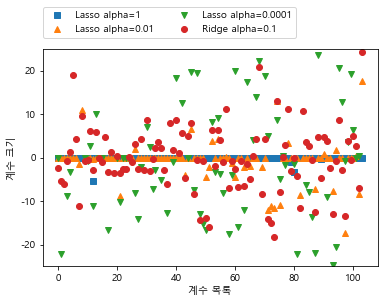

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1") #alpha1
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01") #alpha 0.01
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")#alpha 0.0001

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1") #Ridge
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.show() 

alpha가 1일 때 계수 대부분이 0일뿐만 아니라 나머지 계수들도 크기가 작음<br>
alpha를 0.01로 줄이면 대부분의 특성이 0이 되는 분포를 얻음<br>
alpha를 0.0001로 하면 계수 대부분이 0이 아니고 값도 커져 규제를 받지 않은 모델을 얻게 됨<br>
Ridge 모델은 alpha=0.01인 라쏘 모델과 성능이 비슷하지만 Ridge를 사용하면 어떤 계수도 0이 되지 않음<br>
두 모델 중 보통 릿지 회귀를 선호<br>
그런데 특성이 많고 그중 일부분만 중요한다면 라쏘가 더 좋은 선택일 수 있음<br>
scikit-learn은 Lasso와 Ridge의 패널티를 결합한 ElasticNet도 제공한다<br>

### 선형회귀 분석 모델 비교

In [40]:
from sklearn import datasets
raw_boston = datasets.load_boston()

#feature, target 데이터 지정
X = raw_boston.data
y = raw_boston.target

#training, test 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te =train_test_split(X,y, random_state=1)

#데이터 표준화
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

##### LinearRegression 선형 회귀 분석으로 데이터 학습

In [41]:
from sklearn.linear_model import LinearRegression
clf_lr = LinearRegression()
clf_lr.fit(X_tn_std, y_tn)

print(clf_lr.coef_)
print('Linear Regression intercept_: ',clf_lr.intercept_) #선형회귀 그래프 y절편

[-1.07145146  1.34036243  0.26298069  0.66554537 -2.49842551  1.97524314
  0.19516605 -3.14274974  2.66736136 -1.80685572 -2.13034748  0.56172933
 -4.03223518]
Linear Regression intercept_:  22.344591029023768


##### 릿지, 라쏘, 엘라스틱 넷 회귀 분석과 비교

In [42]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#모델 학습
clf_ridge = Ridge(alpha=1) #알파값에따라 규제강도 달라짐
clf_ridge.fit(X_tn_std, y_tn)

clf_lasso = Lasso(alpha=0.01)
clf_lasso.fit(X_tn_std, y_tn)

clf_elastic = ElasticNet(alpha=0.01, l1_ratio=0.01)
clf_elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.01, l1_ratio=0.01)

In [43]:
#상관계수 비교
print(clf_ridge.coef_)
print(clf_lasso.coef_)
print(clf_elastic.coef_)

[-1.05933451  1.31050717  0.23022789  0.66955241 -2.45607567  1.99086611
  0.18119169 -3.09919804  2.56480813 -1.71116799 -2.12002592  0.56264409
 -4.00942448]
[-1.04326518  1.27752711  0.1674367   0.66758228 -2.41559964  1.99244179
  0.14733958 -3.09473711  2.46431135 -1.60552274 -2.11046422  0.55200229
 -4.00809905]
[-1.02916603  1.23681955  0.15236504  0.67859622 -2.34646781  2.02965524
  0.14575132 -2.98592423  2.32013379 -1.48829485 -2.09271972  0.56506801
 -3.9495281 ]


In [44]:
#Intercept 비교
print(clf_ridge.intercept_)
print(clf_ridge.intercept_)
print(clf_ridge.intercept_)

22.344591029023768
22.344591029023768
22.344591029023768


##### 데이터 예측

In [45]:
pred_lr = clf_lr.predict(X_te_std)
pred_ridge = clf_ridge.predict(X_te_std)
pred_lasso = clf_lasso.predict(X_te_std)
pred_elastic = clf_elastic.predict(X_te_std)

##### 모형평가 1 - R 제곱값
    : 0과 1 사이값을 가지며 높을수록 좋은 성능을 가짐

In [46]:
from sklearn.metrics import r2_score
print(r2_score(y_te, pred_lr))
print(r2_score(y_te, pred_ridge))
print(r2_score(y_te, pred_lasso))
print(r2_score(y_te, pred_elastic))
#  ridge > elastic > lasso 순으로 성능 좋음

0.7789410172622858
0.7789704562726603
0.7787621490259894
0.7787876079239252


##### 모형평가 2 - MSE
    : 선형 회귀분석 모델 평가에 자주 사용, 작을수록 좋은 성능을 가짐

In [47]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_elastic))
# lr > ridge > elastic > lasso 순으로 성능 좋음

21.897765396049493
21.91548381050483
21.894849212618773
21.912961890936874


## *  선형 분류 알고리즘

    1. svm.LinearSVC(Support Vector Classifier) 선형서포트벡터머신
    2. linear_model.LogisticRegression 로지스틱 회귀
    
* 일반 선형회귀분석에서는 타깃 데이터의 범위제한이 없어 분류문제를 풀기에 부적합
* 기존의 선형회귀모형식이 분류문제를 풀 수 있도록 결과값에 제한범위를 줌

## 1.  선형 서포트 벡터 머신(SVM)

    : 서포트벡터머신은 주어진 데이터를 바탕으로 두 카테고리 사이의 간격 
    (Margin)을 최대화하려는 데이터 포인트(서포트 벡터)를 찾아내고 
    그 서포트벡터에 수직인 경계를 통해 데이터를 분류하는 알고리즘

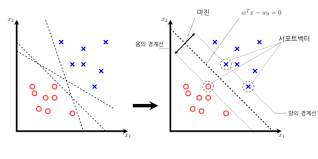

## 2. 로지스틱회귀

In [48]:
#데이터 불러오기 
from sklearn import datasets
raw_cancer =datasets.load_breast_cancer()

X = raw_cancer.data
y = raw_cancer.target

In [49]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X,y, random_state=0)

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [50]:
from sklearn.linear_model import LogisticRegression
clf_logi_l2 = LogisticRegression(penalty='l2')
clf_logi_l2.fit(X_tn_std, y_tn)

LogisticRegression()

In [51]:
pred_logistic = clf_logi_l2.predict(X_te_std)
pred_proba = clf_logi_l2.predict_proba(X_te_std)

### 선형서포트벡터머신, 로지스틱회귀 비교 

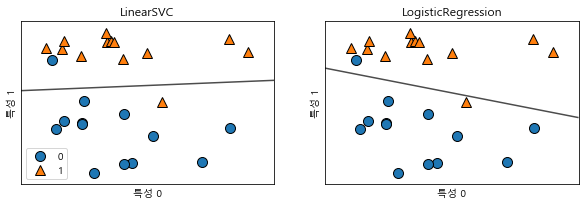

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()
plt.show() 

* 첫 번째 특성을 x축에 놓고 두 번째 특성을 y축에 놓았다.
* 위쪽은 클래스1, 아래쪽은 클래스 0으로 나누고 있다.
* 이 두모델은 회귀에서 본 Ridge와 같이 L2 규제를 사용한다.
* LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.
* C의값이 놓아지면 규제가 감소하고 계수벡터(w)가 0에 가까워 지며, C의값을 높게하면 훈련세트에 가능한 맞춘다

#### LogisticRegression, LinearSVC 에서 규제 강도 C

   * C의 값이 높아지면 규제가 감소
   * 매개변수로 높은 C를 지정하면 모델이 훈련세트에 가능한 최대로 맞추려하고
   * C값은 낮추면 모델은 계수벡터 w가 0에 가까워지도록 함

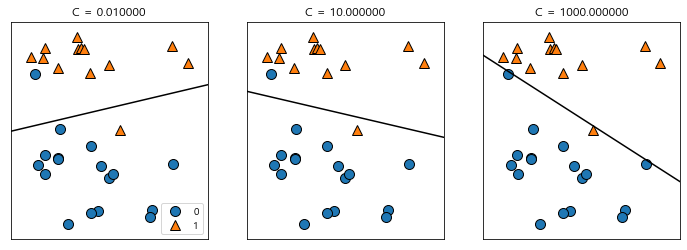

In [53]:
mglearn.plots.plot_linear_svc_regularization()

#### 1) 그림은 아주 작은 C값으로 규제가 많이 적용되었다.
* 규제가 많이 적용된 모델은 비교적 수평에 가까운 결정 경계를 만들었고,
* 잘못 분류된 데이터는 2개이다

#### 2)  그림은 C값이 조금 더 크며, 
* 잘못 분류한 두 데이터에 민감해져 결정 경계가 기울어짐.

#### 3) 그림은 C값을 아주 크게하여
* 결정 경계는 크게 기울고, 1개만 잘못 분류되었다.
* 전체를 정확하게 분류하려했지만, 전체적인 배치를 잘못 파악해 과대적합


* 회귀와 비슷하게 분류에서의 선형모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적으로 보인다.

* 하지만 고차원에서는 분류에 대한 선형모델이 강해지며, 특성이 많아지면 과대적합되지 않도록해야한다.

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [55]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))
#과소적합

훈련 세트 점수: 0.981
테스트 세트 점수: 0.965


In [56]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))
#과대적합

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


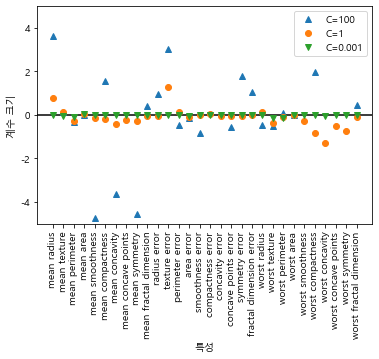

In [57]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()
plt.show()

* LogisticRegression은 기본으로 L2규제를 적용하므로 Ridge로 만든 모습과 비슷
* 규제를 강하게 할수록 계수들을 0에 더 가깝게 만들지만 완전히 0이 되지는 않는다.
* 보스턴 주택가격 데이터 셋에 대한 릿지 회귀의 계수 크기 그래프
* 더 이해하기 쉬운 모델을 원한다면 L1규제를 사용하는것이 좋다.
* penalty 매개변수를 통해 L1규제를 사용할 수 있다.
* 다음은 L1 규제를 사용할 때의 분류 정확도와 계수 그래프이다.
* 중요한 점은 규제에서 모든특성을 사용할지(L2규제) 일부 특성만 사용할지(L1)인지 결정하는 penalty 매개변수가 차이이다.

####  L1규제를 사용하여 각기 다른 C값을 적용한 로지스틱 회귀 모델의 계수

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


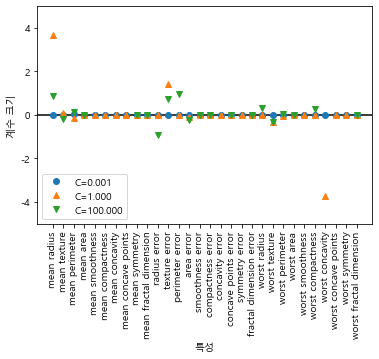

In [58]:
#Solver : 최적화 알고리즘, max_iter : 최대 반복 횟수값
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show() # 책에는 없음

# 다중 클래스 분류용 선형 모델

### 일대다 방식을 이용한 다중 클래스 분류 알고리즘

    : 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델 학습
    -> 클래스 수 만큼 이진 분류 모델 생성
    
 * 각 클래스 마다 계수벡터(w)와 절편을 하나씩 갖고, 결과값이 높은 클래스가 해당 데이터 클래스 레이블로 할당됨

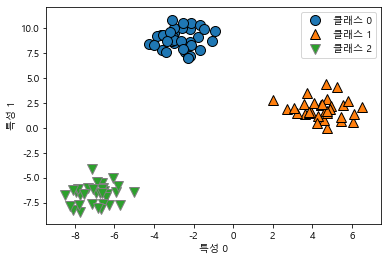

In [59]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0','클래스 1','클래스 2'])

In [60]:
linear_svm = LinearSVC().fit(X,y)
print('가중치 벡터의 크기:',linear_svm.coef_.shape)
print('절편 배열의 크기:', linear_svm.intercept_.shape)
print(linear_svm.coef_)

가중치 벡터의 크기: (3, 2)
절편 배열의 크기: (3,)
[[-0.17492629  0.23139816]
 [ 0.47621864 -0.0693725 ]
 [-0.1891398  -0.20400375]]


##### coef_  의 행은 세 개의 클래스에 각각 대응하는 가중치벡터를 담고 있고, 
##### 열은 각 특성에 따른 계수 값을 가짐

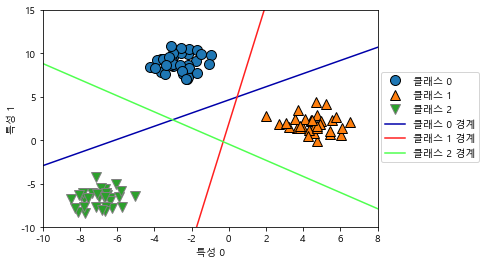

In [61]:
#세 개의 이진 분류기가 만드는 결정경계 시각화

mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)

# 결정경계 기울기 : -W[0]/W[1], 결정경계 절편:-I[0]/W[1]
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스 0', '클래스 1','클래스 2', '클래스 0 경계','클래스 1 경계','클래스 2 경계'], loc=(1.01,0.3))

#### 선형 모델 정리 
* 선형 모델의 주요 매개변수는 
* 회귀모델에서는 alpha였고, LinearSVC와 LogisticRegression에서는 C였다.
* alpha값이 클수록, C값이 작을수록 모델이 단순해진다.
* 보통 C와 alpha는 로그스케일로 최적치를 정한다.(1->0.01,10,10000)

* 그리고 L1규제를 사용할지 L2규제를 사용할지를 정해야 한다.
* 중요한 특성이 많지 않으면 L1을 사용하고, 그렇지 않으면 기본적으로 L2를 사용한다.
* L1규제는 몇가지 특성만 사용하므로 모델에 중요한 특성이 무엇이고 효과가 어느정도인지 설명하기 쉽다.
* 선형 모델은 학습 속도가 빠르고 예측이 빠르다. 또한 다른 모델에 비해 이해하기 쉽다.


### 나이브 베이즈 분류기

#### 나이브 베이즈(Naive bayes)
    : 서로 조건부 독립인 피처를 가정하고, 베이즈 이론을 기반으로 하는 알고리즘
        

!['image'](https://miro.medium.com/max/600/1*aFhOj7TdBIZir4keHMgHOw.png)

In [62]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {}

#y가 0일때 : 클래스 1,3 / y가 1일때: 2,4
for label in np.unique(y): #y unique : 0,1 
    counts[label]=X[y==label].sum(axis=0) #행으로 더하기 

print('특성 카운트:\n', counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [71]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

raw_wine = datasets.load_wine()

X = raw_wine.data
y = raw_wine.target

X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)

# 데이터 표준화
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_td_std = std_scale.transform(X_te)

#나이브 베이즈 학습
clf_gnb = GaussianNB().fit(X_tn_std, y_tn)

# 예측 
pred_gnb = clf_gnb.predict(X_td_std)
print(pred_gnb)


[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]
